# Setting up the dependencies

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import correlate
from scipy.signal import convolve2d

# Importing the Image
In the code above, we first load the image from disk using PIL and explicitly convert it to grayscale, since convolution and edge-detection analysis are easier to reason about in a single intensity channel. The image is then converted into a NumPy array and normalized to the [0,1][0, 1][0,1] range so that pixel values represent meaningful signal magnitudes rather than raw byte intensities. For this experiment, we use an image of a chameleon generated using Nano Banana 3, chosen because it is a real, textured object placed well within the frame—making any strong responses at the image borders clearly attributable to padding rather than true visual edges.


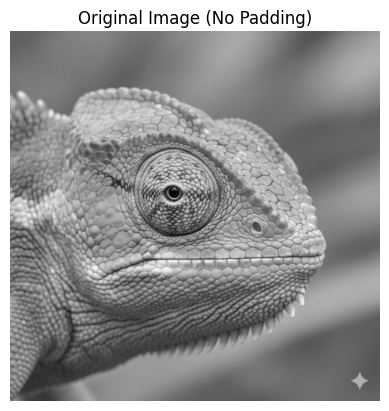

In [13]:
img = Image.open('/content/Gemini_Generated_Image_dtrwyedtrwyedtrw.png').convert('L') # Load as Grayscale
img_array = np.array(img) / 255.0               # Normalize to [0, 1]

plt.imshow(img, cmap="gray")
plt.title("Original Image (No Padding)")
plt.axis("off")
plt.show()

# Padding the Image with Zeroes
In this step, we apply zero padding to the image by adding a border of fixed width around all sides using NumPy’s pad function. The parameter mode='constant' with constant_values=0 explicitly fills the padded region with zeros, effectively surrounding the original image with a black frame. This operation does not add new visual information; instead, it introduces a sharp intensity discontinuity at the boundary between real pixels and padded pixels.


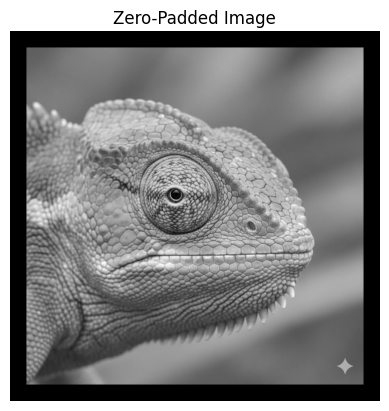

In [14]:
pad_width = 50
padded_img = np.pad(img_array, pad_width, mode='constant', constant_values=0)

plt.imshow(padded_img, cmap="gray")
plt.title("Zero-Padded Image")
plt.axis("off")
plt.show()

# Applying an Edge Detection Kernel
Here, we use a simple Laplacian-style edge detection kernel, which is designed to respond strongly to sudden intensity changes and high-frequency signals such as edges. We apply the same kernel to both the original image and the zero-padded image using correlation. Since the filter remains unchanged, any differences in the output can be attributed solely to the padding. Strong edge responses near the borders of the padded image are not caused by real image features, but by the artificial zero-valued boundaries introduced through zero padding.


In [18]:
edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

# Convolve both images
edges_original = correlate(img_array, edge_kernel)
edges_padded = correlate(padded_img, edge_kernel)

# Visualizing Padding Artifacts and Distribution Shift


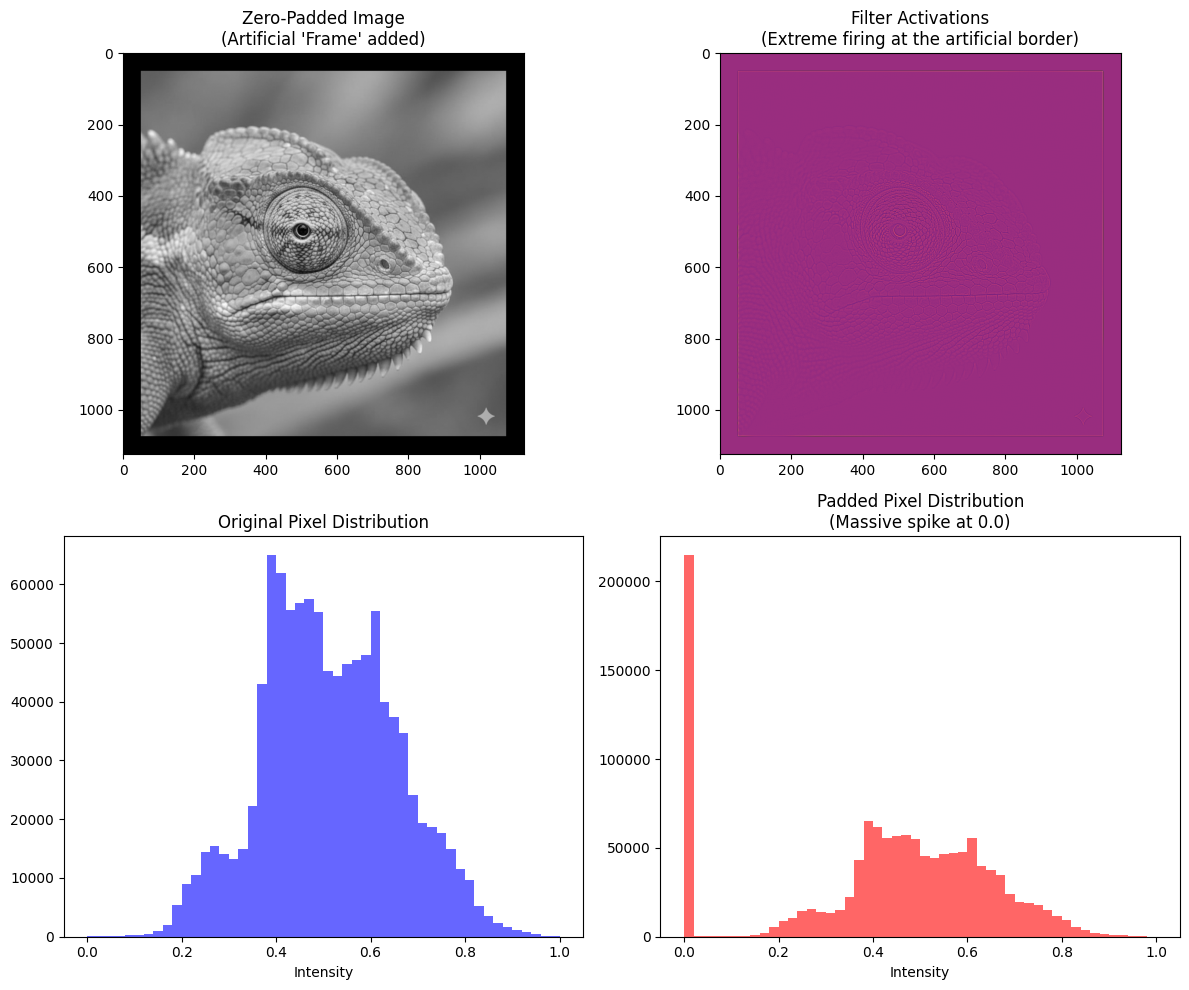

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Show Padded Image
axes[0, 0].imshow(padded_img, cmap='gray')
axes[0, 0].set_title("Zero-Padded Image\n(Artificial 'Frame' added)")

# Show Filter Response (The Step Function Problem)
axes[0, 1].imshow(edges_padded, cmap='magma')
axes[0, 1].set_title("Filter Activations\n(Extreme firing at the artificial border)")

# Show Distribution Shift
axes[1, 0].hist(img_array.ravel(), bins=50, color='blue', alpha=0.6, label='Original')
axes[1, 0].set_title("Original Pixel Distribution")
axes[1, 0].set_xlabel("Intensity")

axes[1, 1].hist(padded_img.ravel(), bins=50, color='red', alpha=0.6, label='Padded')
axes[1, 1].set_title("Padded Pixel Distribution\n(Massive spike at 0.0)")
axes[1, 1].set_xlabel("Intensity")

plt.tight_layout()
plt.show()

In the top-left, the zero-padded image shows a uniform black frame added around the original chameleon image. This frame does not come from the data itself—it is an artificial construct introduced purely for architectural convenience. In the top-right, the edge filter response reveals the consequence: despite no real semantic edges at the image boundary, the filter fires strongly along the padded border. This happens because the transition from real pixel values to zero creates a sharp step function, which edge detectors are explicitly designed to amplify.

The bottom row highlights the deeper statistical issue. The histogram of the original image shows a smooth, natural distribution of pixel intensities. In contrast, the padded image distribution exhibits a massive spike at intensity 0.0, representing the injected zero-valued pixels. This spike indicates a clear distribution shift introduced by padding alone.
